In [1]:
from rljax.algorithm import DQN
from rljax.trainer import Trainer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from micro_price_trading.config import TWENTY_SECOND_DAY
from micro_price_trading import Preprocess, OptimalExecutionEnvironment

In [2]:
raw = Preprocess('TBT_TBF_data.csv', res_bin=7)
data = raw.process()

In [3]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 25000
SEED = 0

env = OptimalExecutionEnvironment(
    data,
    risk_weights=(2, 1),
    trade_penalty=1.5,
    max_purchase=4,
    steps=TWENTY_SECOND_DAY,
    end_units_risk=TWENTY_SECOND_DAY,  # Ideally, this should be `TWENTY_SECOND_DAY//5*2`
    seed=SEED
)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-3,  # Have been messing around with this but doesn't seem to make a big difference
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=5000,
    seed=SEED,
)
trainer.train()

Num steps: 5000     Return: -270.0   Time: 0:00:56
Num steps: 10000    Return: -70.0   Time: 0:01:48
Num steps: 15000    Return: -250.0   Time: 0:02:42
Num steps: 20000    Return: -480.0   Time: 0:03:40
Num steps: 25000    Return: -380.0   Time: 0:04:37


KeyboardInterrupt: 

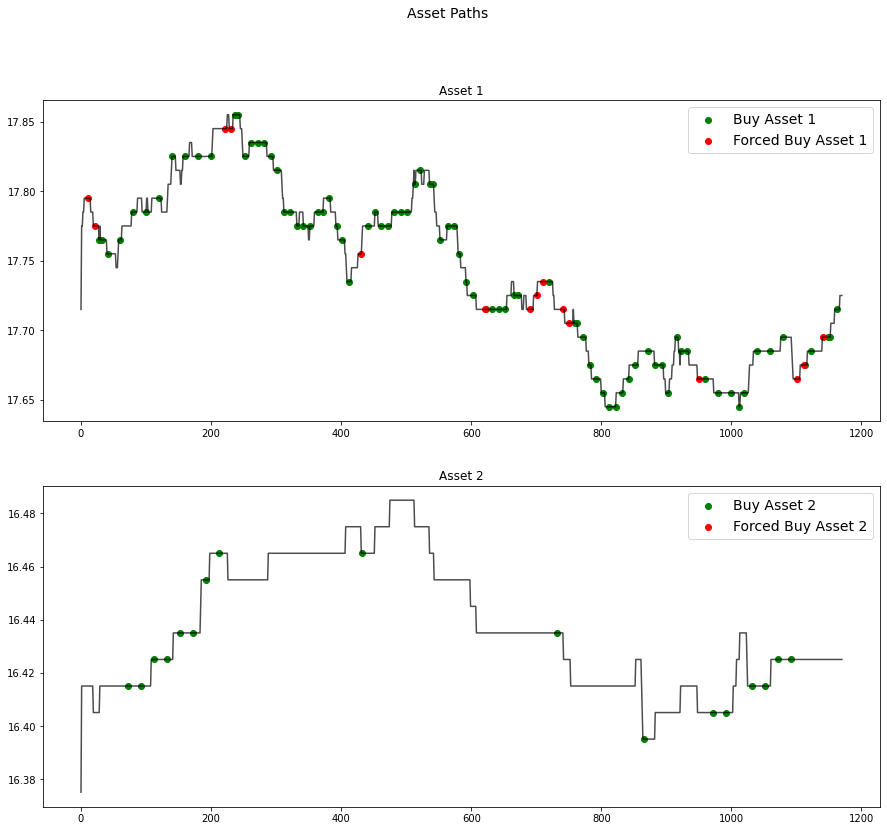

In [4]:
env_test.plot('asset_paths')

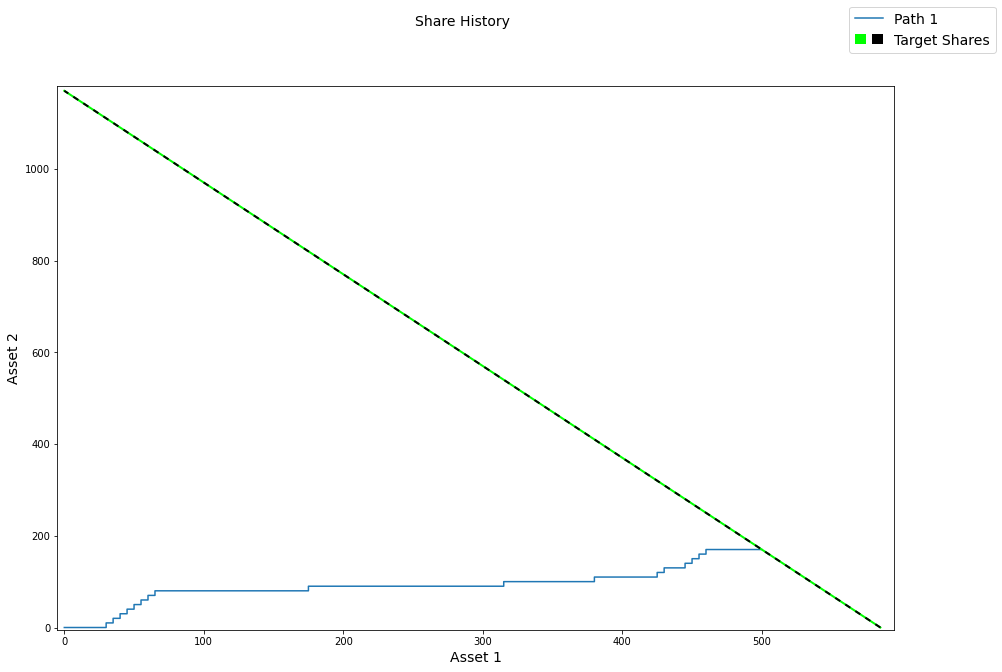

In [5]:
env_test.plot()

In [6]:
df = env_test.portfolios_to_df()

In [7]:
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',10000)
df

,time,cash,shares,prices,total_risk,res_imbalance_state,trade,penalty_trade,trade_asset,trade_shares,trade_risk,trade_price,trade_cost,trade_penalty,risk,next_risk_target,distance_to_next_risk_target,rewards,observations,raw_action,action
0,0,0.0000,"(0, 0)","(17.71499999999999, 16.374999999999993)",0.0,120,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,NaN,NaN,0.0,-1.0
1,1,0.0000,"(0, 0)","(17.775, 16.415)",0.0,210,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,"(0, actual)","[21.0, 10]",0.0,-1.0
2,2,0.0000,"(0, 0)","(17.775, 16.415)",0.0,221,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,"(0, actual)","[25.0, 10]",0.0,-1.0
3,3,0.0000,"(0, 0)","(17.785, 16.415)",0.0,221,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,"(0, actual)","[25.0, 10]",0.0,-1.0
4,4,0.0000,"(0, 0)","(17.785, 16.415)",0.0,221,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,"(0, actual)","[25.0, 10]",0.0,-1.0
5,5,0.0000,"(0, 0)","(17.795, 16.415)",0.0,221,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,"(0, actual)","[25.0, 10]",0.0,-1.0
6,6,0.0000,"(0, 0)","(17.795, 16.415)",0.0,221,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,"(0, actual)","[25.0, 10]",0.0,-1.0
7,7,0.0000,"(0, 0)","(17.795, 16.415)",0.0,221,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,"(0, actual)","[25.0, 10]",0.0,-1.0
8,8,0.0000,"(0, 0)","(17.795, 16.415)",0.0,221,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,"(0, actual)","[25.0, 10]",0.0,-1.0
9,9,0.0000,"(0, 0)","(17.795, 16.415)",0.0,221,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,1160.0,1160.0,"(0, actual)","[25.0, 10]",0.0,-1.0


In [8]:
np.unique(df.action, return_counts = True)

(array([-1.,  0.,  1., nan]), array([1068,   85,   17,    1]))

In [9]:
df[df.action == -3]

,time,cash,shares,prices,total_risk,res_imbalance_state,trade,penalty_trade,trade_asset,trade_shares,trade_risk,trade_price,trade_cost,trade_penalty,risk,next_risk_target,distance_to_next_risk_target,rewards,observations,raw_action,action


In [10]:
env_test._reverse_mapping[0]

'000'

In [20]:
f'{0.000000048376:<5.5E}'

'4.83760E-08'

TypeError: joinpath() got an unexpected keyword argument 'format'

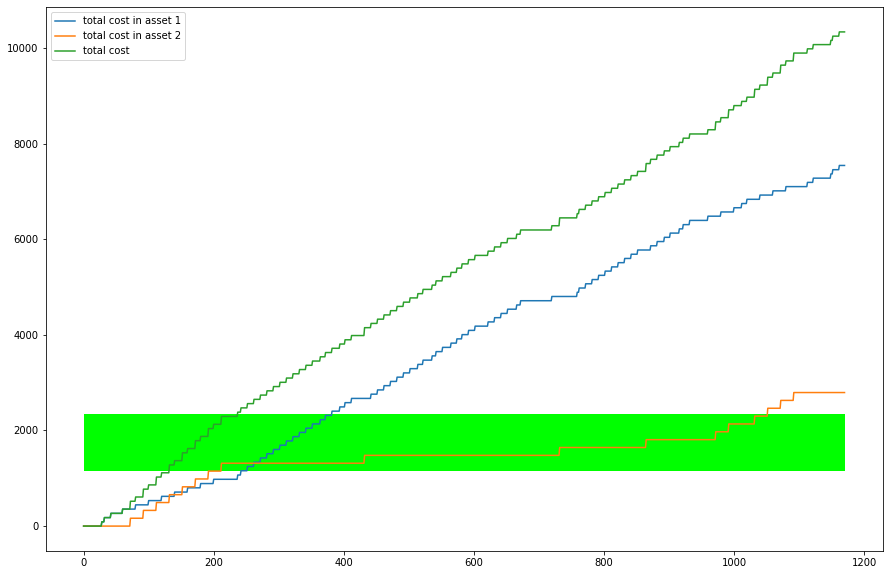

In [11]:
env_test.plot('extensive_risk_history')

#### Raw actions input by DQN before they are zero centered

In [21]:
env_test._raw_actions[-1]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


#### Rewards along with a flag for the type of reward

In [22]:
env_test._rewards[-1]

[(0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-0.09000000000001407, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0.020000000000003126, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'forced no trade'),
 (0.0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0.0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0, 'forced no trade'),
 (0.0, 'actual'),
 (0, 'actual'

#### Raw observations seen by DQN

In [23]:
env_test._observations[-1]

[[21.0, 10],
 [25.0, 10],
 [25.0, 10],
 [25.0, 10],
 [25.0, 10],
 [25.0, 10],
 [25.0, 10],
 [25.0, 10],
 [25.0, 10],
 [22.0, 10],
 [22.0, 10.0],
 [22.0, 10.0],
 [19.0, 10.0],
 [22.0, 10.0],
 [21.0, 10.0],
 [21.0, 10.0],
 [21.0, 10.0],
 [21.0, 10.0],
 [21.0, 10.0],
 [21.0, 10.0],
 [21.0, 10.0],
 [18.0, 10.0],
 [18.0, 10.0],
 [18.0, 10.0],
 [18.0, 10.0],
 [18.0, 10.0],
 [27.0, 10.0],
 [45.0, 1, 0.0],
 [33.0, 0.0],
 [34.0, 0.0],
 [28.0, 10.0],
 [28.0, 7, 0.0],
 [28.0, 6, 0.0],
 [28.0, 5, 0.0],
 [28.0, 4, 0.0],
 [28.0, 3, 0.0],
 [31.0, 2, 0.0],
 [31.0, 1, 0.0],
 [31.0, 0.0],
 [31.0, 0.0],
 [31.0, 10.0],
 [31.0, 7, 0.0],
 [22.0, 6, 0.0],
 [22.0, 5, 0.0],
 [22.0, 4, 0.0],
 [22.0, 3, 0.0],
 [21.0, 2, 0.0],
 [21.0, 1, 0.0],
 [21.0, 0.0],
 [21.0, 0.0],
 [21.0, 10.0],
 [21.0, 10.0],
 [21.0, 10.0],
 [12.0, 10.0],
 [12.0, 10.0],
 [12.0, 10.0],
 [12.0, 10.0],
 [12.0, 10.0],
 [32.0, 10.0],
 [32.0, 9, 0.0],
 [31.0, 8, 0.0],
 [31.0, 7, 0.0],
 [31.0, 6, 0.0],
 [32.0, 5, 0.0],
 [31.0, 4, 0.0],
 [31.0, 3

### Raw format for accessing the portfolio history
Should ideally be gotten by `env_test.portfolio_history`

## FOR SOME REASON, THE LENGTH OF THIS IS NOWHERE NEAR WHAT IT SHOULD BE FOR THE BASE TRAINING ENV. I AM GETTING AROUND 17 ENTRIES FOR IT BUT THE ENV_TEST SEEMS TO BE CORRECT

In [ ]:
env_test._portfolios[3][-1]

In [ ]:
env_test.end_units_risk

In [ ]:
env_test._period_risk.get(5, env_test.end_units_risk)

In [ ]:
env_test.end_units_risk - env_test.current_portfolio.total_risk

In [ ]:
env_test.prices_at_start

In [ ]:
# print(env_test.step(2))
# env_test._portfolios[-1][-1]

### Not sure this plot is fully correct, when the shares hit this line perfectly, they fail to hit the risk plot perfectly. This also happens in reverse

In [ ]:
env_test.plot()

### Case and point, shares hit well but risk doesn't

In [ ]:
env_test.plot('risk_history')

### Count number of chosen trades
Can use `len([p.time for p in env_test.portfolio_history[-1] if (p.trade or p.penalty_trade)])` for all trades or `len([p.time for p in env_test.portfolio_history[-1] if (p.penalty_trade)])` for the penalty trades

In [ ]:
len([p.time for p in env_test.portfolio_history[-1] if (p.trade)])

### Changes the `env_test._period_risk` dictionary to have the amount of risk we should have bought instead of the amount of risk remaining

In [ ]:
dict(zip(env_test._period_risk.keys(), env_test.end_units_risk-np.array(list(env_test._period_risk.values()))))

In [ ]:
list(zip(env_test._rewards[-1], env_test.portfolio_history[-1]))

In [ ]:
env_test._observations[-1]

In [ ]:
plt.plot(np.cumsum(env_test._rewards[-1]))

In [ ]:
import numpy as np

In [ ]:
env_test.risk_history[-1]

In [ ]:
set(np.gradient(env_test.risk_history[-1]))

In [ ]:
env_test.portfolio_history

In [ ]:
np.argwhere(env_test.risk_history[-1] > env_test.end_units_risk)